In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data into a pandas DataFrame
# The dataset is related to credit card transactions and is stored in a CSV file.
# The path should be updated according to the file's location in your system.
df = pd.read_csv('C:/Users/ABHISHEK DEORE/OneDrive/Desktop/Projects/Credit Card Fraud Detection/data/creditcard.csv')

In [4]:
# Set pandas display options to ensure all columns and their contents are visible when printing the DataFrame
# 'display.max_columns': ensures all columns are displayed (None means no column limit)
# 'display.width': removes the limit on the width of the printed DataFrame (None means automatic width adjustment)
# 'display.max_colwidth': sets no limit on the maximum column width, showing full content of each cell

pd.set_option('display.max_columns', None)  # Display all columns without truncation
pd.set_option('display.width', None)        # Remove limit on display width
pd.set_option('display.max_colwidth', None) # Ensure no truncation of column content


In [5]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data
# This is useful for verifying the data has been loaded correctly and to inspect the structure and values of the dataset.

df.head()  # Show the top 5 rows of the DataFrame by default


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Generate descriptive statistics for numerical columns in the DataFrame
# This includes metrics like count, mean, standard deviation, minimum, quartiles, and maximum values
# It helps to understand the distribution and central tendencies of the dataset.

df.describe()  # Provides summary statistics for numeric columns in the DataFrame


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Display a concise summary of the DataFrame, including the number of non-null values, column data types, and memory usage
# This is useful for understanding the structure of the dataset and identifying any missing data or irregular data types.

df.info()  # Provides a concise summary of the DataFrame's structure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Count the occurrences of each unique value in the 'Class' column
# This is typically used in classification tasks to check class distribution
# In the context of credit card fraud detection, the 'Class' column indicates whether a transaction is fraudulent (1) or not (0).

df["Class"].value_counts()  # Displays the count of each class (0 or 1) in the 'Class' column


Class
0    284315
1       492
Name: count, dtype: int64

The dataset shows a severe imbalance with only 492 fraudulent transactions out of 284,807 total transactions (0.173%). This imbalance will significantly impact model training and evaluation. Standard accuracy metrics might be misleading, and special techniques like oversampling, undersampling, or adjusted class weights will be crucial for effective model development.

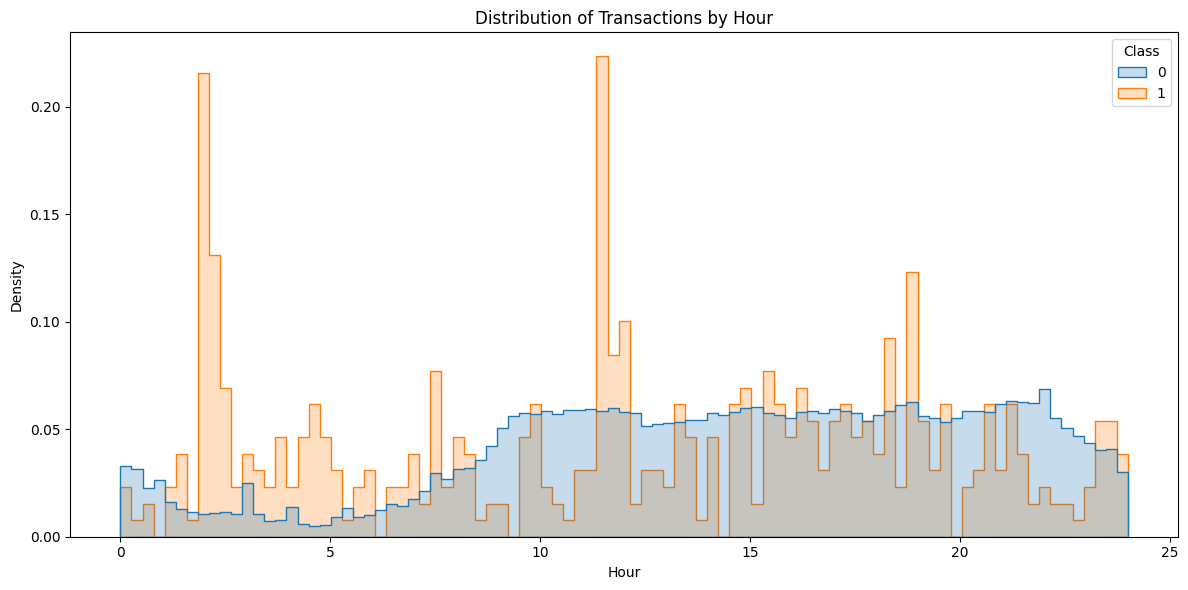

In [11]:
# Time analysis: Create a new column 'Hour' to represent the hour of the day when each transaction occurred
# The 'Time' column records the time in seconds from the first transaction. We convert it into hours by dividing by 3600 and applying modulus 24.
df['Hour'] = df['Time'].apply(lambda x: (x / 3600) % 24)

# Plot the distribution of transactions by hour, with a distinction between fraudulent and non-fraudulent transactions
# 'sns.histplot' creates a density plot for transaction times, using 'Hour' on the x-axis and 'Class' as a hue to differentiate between classes.
# The plot uses 'step' element for better visualization of overlapping data, and 'common_norm=False' ensures separate density normalization for each class.
plt.figure(figsize=(12, 6))  # Set the figure size to make the plot larger and clearer
sns.histplot(data=df, x='Hour', hue='Class', element='step', stat='density', common_norm=False)
plt.title('Distribution of Transactions by Hour')  # Add a title to the plot for clarity
plt.tight_layout()  # Automatically adjust plot layout for better readability
plt.show()  # Display the plot


The distribution of transactions by hour reveals distinct patterns for fraudulent activities. Fraudulent transactions spike at specific times (around 2-3 AM, 11-12 PM, and 8-9 PM) when legitimate transactions are lower. This suggests that time-based features could be highly valuable for fraud detection, and our models should pay special attention to transactions occurring during these high-risk periods.

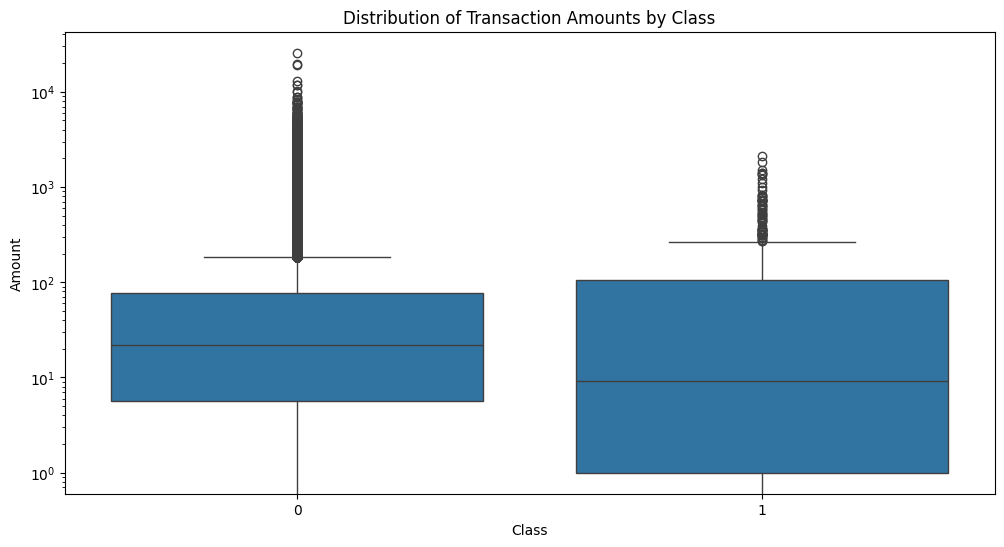

In [12]:
# Amount analysis: Plot the distribution of transaction amounts for fraudulent and non-fraudulent transactions using a box plot
# The box plot will show the spread of the 'Amount' variable for each class (fraudulent and non-fraudulent).
# Fraudulent transactions are often expected to have different distribution patterns compared to non-fraudulent ones.

plt.figure(figsize=(12, 6))  # Set the figure size for clarity
sns.boxplot(x='Class', y='Amount', data=df)  # Create a box plot to show transaction amounts by class (fraudulent vs non-fraudulent)
plt.title('Distribution of Transaction Amounts by Class')  # Add a title to the plot

# Apply a logarithmic scale to the y-axis to handle wide variation in transaction amounts and to better visualize outliers and skewness
plt.yscale('log')  

plt.tight_layout()  # Ensure the layout fits well in the figure
plt.show()  # Display the plot


While there's significant overlap in transaction amounts between fraudulent and non-fraudulent transactions, fraudulent transactions tend to have lower median values and less variability. However, both classes show outliers, indicating that amount alone is not a definitive indicator of fraud. Models should consider amount in conjunction with other features for effective detection.

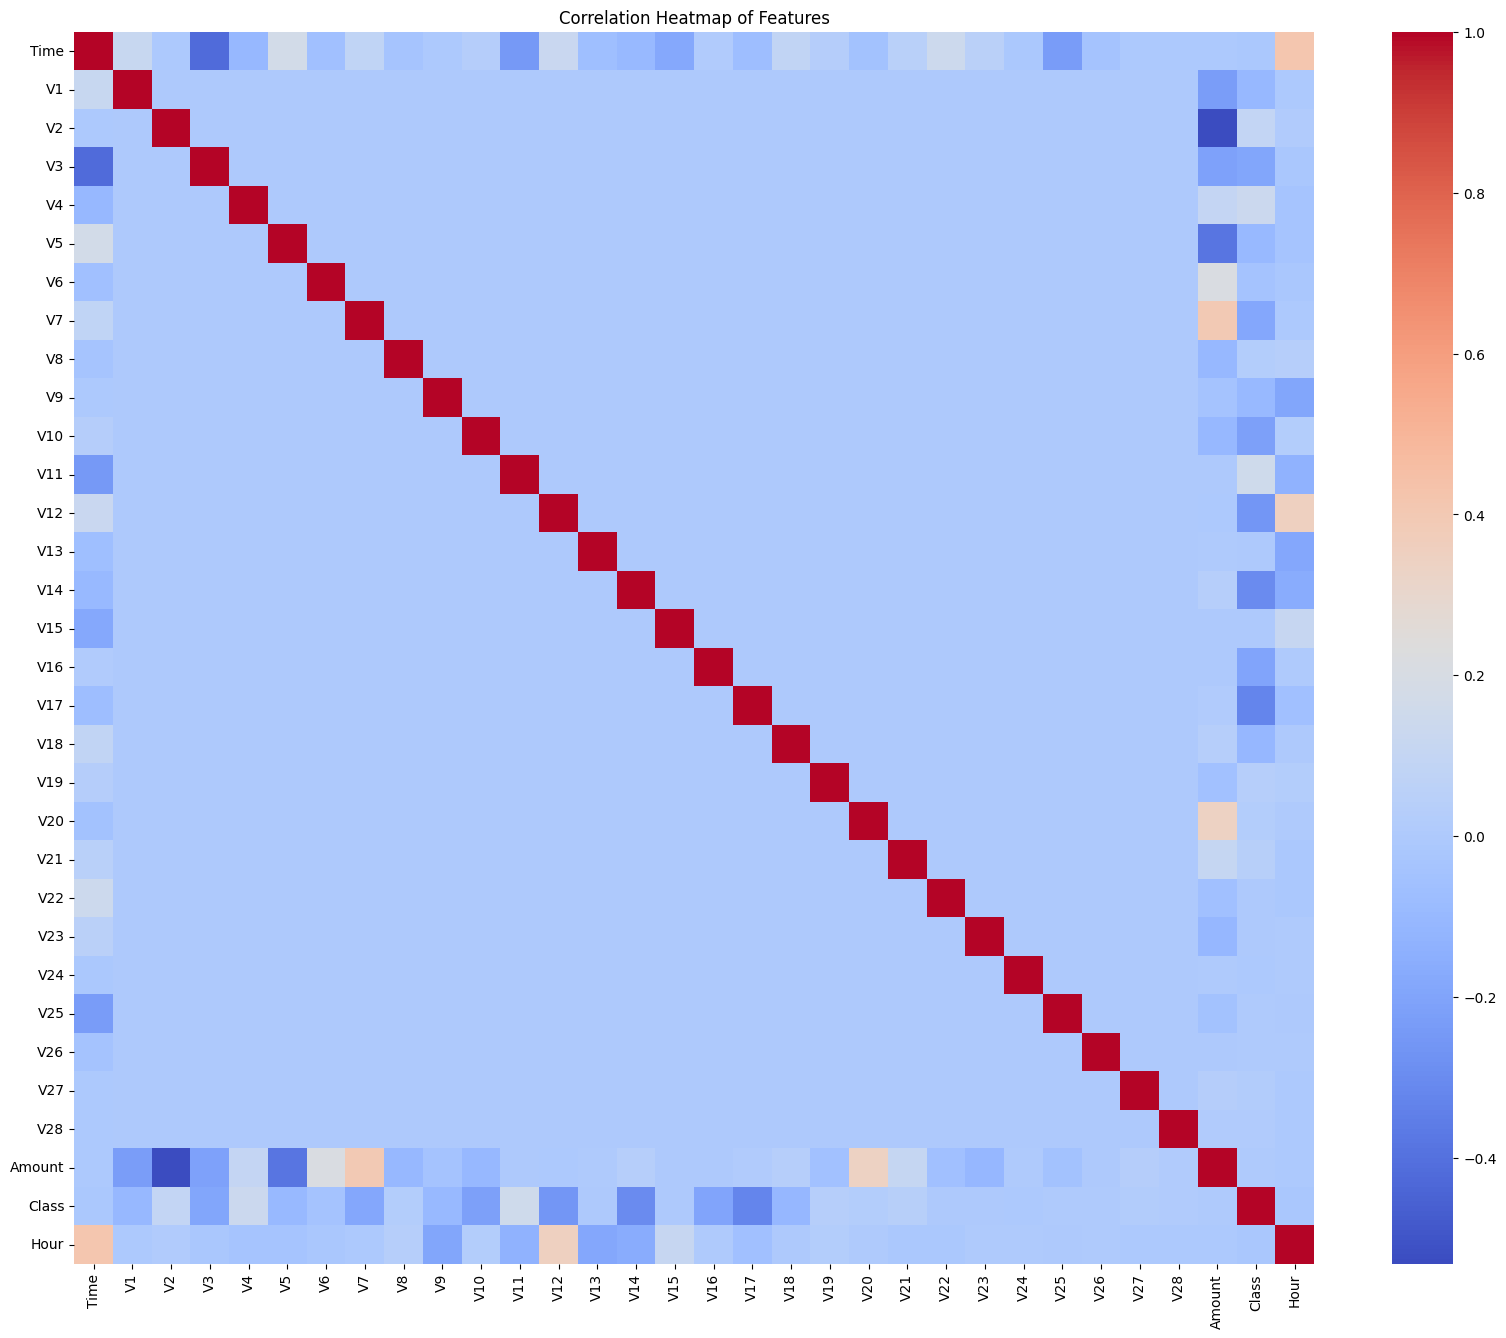

In [17]:
# Correlation analysis: Calculate the correlation matrix to understand the relationships between different numerical features in the dataset.
# The correlation matrix shows how strongly each pair of features is related. Values range from -1 (strong negative correlation) to 1 (strong positive correlation).

corr_matrix = df.corr()  # Compute the correlation matrix for the DataFrame's numeric columns

# Plot the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(20, 16))  # Set the figure size to ensure the heatmap is large enough to be readable
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)  # Create a heatmap, using the 'coolwarm' color map. Set 'annot=False' to hide the correlation values on the heatmap.
plt.title('Correlation Heatmap of Features')  # Add a title to the heatmap

# Save the heatmap as an image file
plt.savefig("corr.jpg")  # Save the heatmap as a .jpg file for future reference or reporting

plt.tight_layout()  # Ensure the layout fits properly in the figure
plt.show()  # Display the heatmap


The correlation heatmap shows that most PCA-transformed features (V1-V28) have low correlations with each other, which is beneficial for model training. However, correlations with the target variable (Class) are generally weak, suggesting complex, non-linear relationships between features and fraudulent activities. This implies that sophisticated, non-linear models might be more effective for fraud detection.


In [14]:
# Feature importance analysis: Determine which features are most important for predicting the 'Class' (fraud or non-fraud) using a Random Forest model

# Prepare the feature matrix X and the target variable y
# Drop the 'Class' and 'Time' columns from X because 'Class' is the target variable and 'Time' may not be as predictive.
X = df.drop(['Class', 'Time'], axis=1)  # Features (excluding the target 'Class' and irrelevant 'Time')
y = df['Class']  # Target variable (fraud vs non-fraud)

# Initialize and train a Random Forest classifier with 100 decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Random state ensures reproducibility
rf.fit(X, y)  # Fit the model to the data

# Extract feature importance from the trained Random Forest model
# The feature importance values indicate how much each feature contributes to predicting the target.
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# Sort the features by importance in descending order to highlight the most important features first
feature_importance = feature_importance.sort_values('importance', ascending=False)


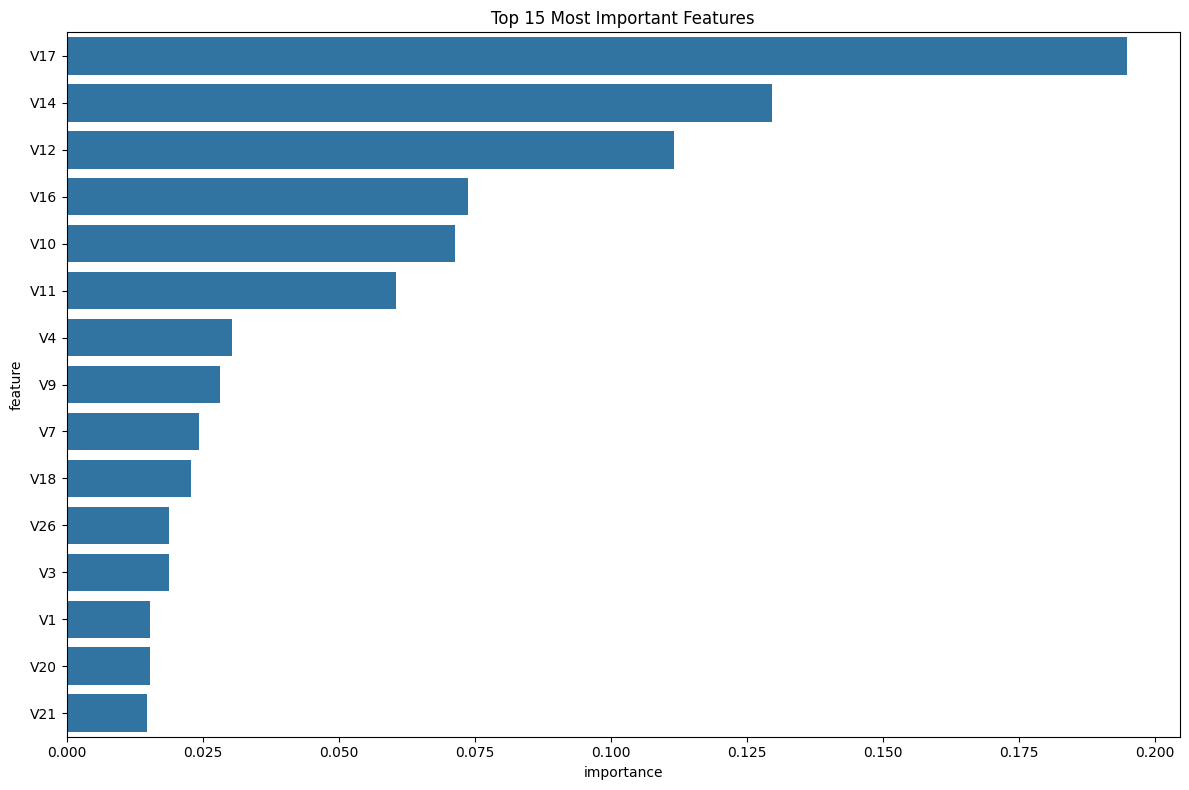

In [19]:
# Plot the top 15 most important features based on the Random Forest model's feature importance scores
# This bar plot shows which features contribute the most to predicting fraud in the dataset.

plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))  # Create a horizontal bar plot for the top 15 features
plt.title('Top 15 Most Important Features')  # Add a title to the plot for clarity

plt.tight_layout()  # Ensure the layout is adjusted for optimal readability
plt.savefig("imp")  # Save the plot as an image file ("imp") for documentation or future reference
plt.show()  # Display the plot


The top 15 most important features are all PCA components, with V17, V14, V12, and V16 being particularly significant. Notably, Time and Amount do not appear in the top 15, despite their potential relevance. This suggests that while the PCA transformation has captured important fraud indicators, combining these top features with engineered time and amount features might yield improved results.